# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [2]:
def StarFormationRate(L,Type,TIR=0,):
    '''This function calculates the star formation rate based on the luminosity as presented in Kennicutt and evans 
    2012 ARA&A equation 12.
    
    Inputs:
    L: float, luminosity in a given band, units of ergs/s
    Type: string, type of luminosity band, FUV,NUV,TIR,Halp
    TIR: float, the total infrared correction luminosity
    
    Returns:
    SFR: float, The log of the star formation rate in M_sun/yr
    '''
    
    if (Type=='FUV'):
        logCx=43.35 #calibration from table 1
        TIRc=0.46 #correction for dust absorption from table 2
    elif (Type=='NUV'):
        logCx = 43.17
        TIRc=0.27
    elif (Type=='Halp'):
        logCx = 41.27
        TIRc=0.0024
    elif (Type=='TIR'):
        logCx = 43.41
        TIRc=0.0
    else:
        print("missing wavelength band!, FUV,NUV,Halp,TIR")
        return 0
        
    #Apply dust correction
    L_corr = L+TIRc*TIR
    #Star formation rate
    SFR = np.log10(L_corr)-logCx
    return SFR

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [3]:
const.L_sun
Lsunergs= const.L_sun.to(u.erg/u.s).value
Lsunergs

3.828e+33

In [4]:
#  WLM Dwarf Irregular Galaxy
#From NED : WLM NUV L is 1.71e7 L sun
#The IR Tot L: NIR 2.48e6, FIR: 7.84e5 L sun
NUV_WLM=1.71e7*Lsunergs
TIR = 2.48e6*Lsunergs+7.84e5*Lsunergs

print('The NUV star formation rate of WLM is: ', StarFormationRate(NUV_WLM,'NUV',TIR))


The NUV star formation rate of WLM is:  -2.3322074670824904


In [5]:
#  NGC24 Sc galaxy


# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift. 

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [6]:
def SFRMainSequence(M,z):
    '''This function calculates the SFR of a galaxy based on the red shift.
    
    Inputs:
    M: float, the stellar mass of the galaxy in M sun
    z: float, the redshift
    
    Returns:
    SFR: float the log of the star formation rate of the galaxy.'''
    
    a = 0.7-0.13*z
    b = 0.38+1.14*z-0.19*z**2
    logSFR = a*(np.log10(M)-10.5)+b
    return logSFR

# Step 2

In [7]:
# MW at z=0
MWdisk=8e10
print("SFR of MW at z=0: ", 10**SFRMainSequence(MWdisk,0))


SFR of MW at z=0:  4.5937038237959715


In [8]:
# MW at z = 1
print("SFR of MW at z=1: ", 10**SFRMainSequence(MWdisk,1))

SFR of MW at z=1:  36.287854588142594


# Step 3

In [9]:
# create an array of stellar masses
mass=np.linspace(1e9,1e12) #dwarf galaxy up to massive elliptical galaxy

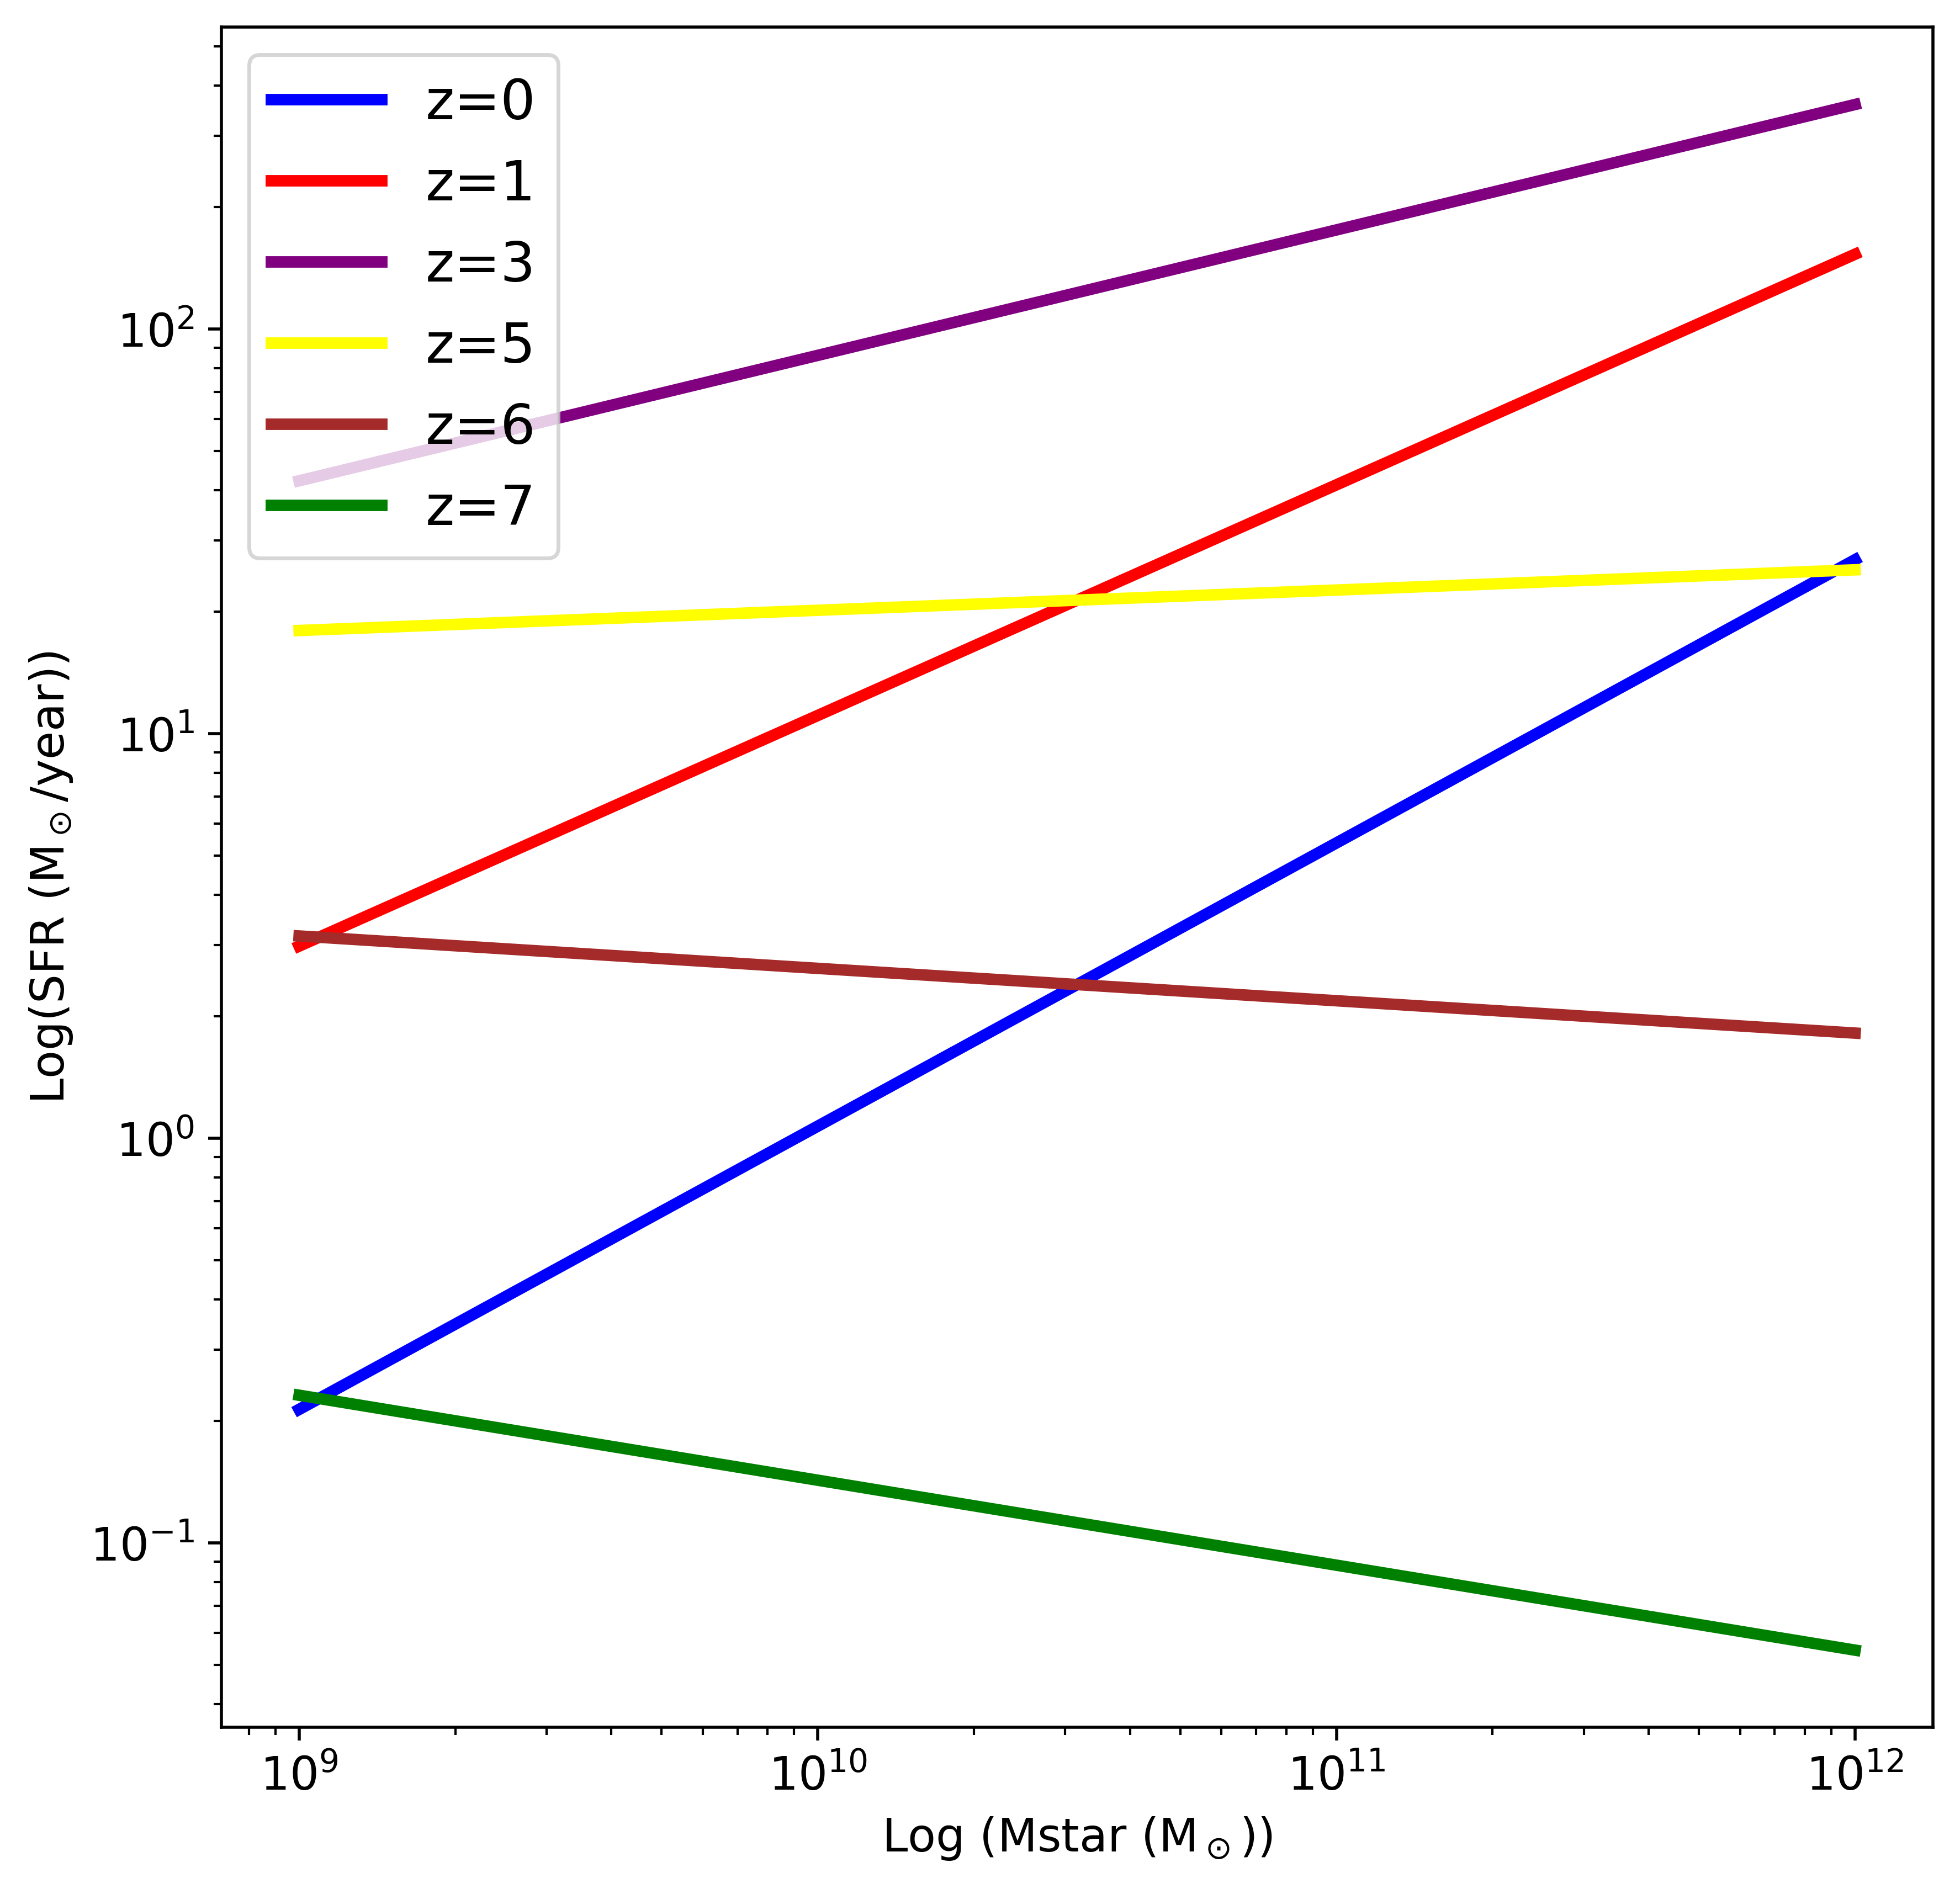

In [15]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(mass,10**SFRMainSequence(mass,0),color='blue',linewidth=3,label='z=0')
plt.loglog(mass,10**SFRMainSequence(mass,1),color='red',linewidth=3,label='z=1')
plt.loglog(mass,10**SFRMainSequence(mass,3),color='purple',linewidth=3,label='z=3')
plt.loglog(mass,10**SFRMainSequence(mass,5),color='yellow',linewidth=3,label='z=5')
plt.loglog(mass,10**SFRMainSequence(mass,6),color='brown',linewidth=3,label='z=6')
plt.loglog(mass,10**SFRMainSequence(mass,7),color='green',linewidth=3,label='z=7')
#plt.loglog(mass,10**SFRMainSequence(mass,10),color='orange',linewidth=3,label='z=10')
#plt.loglog(mass,10**SFRMainSequence(mass,12),color='black',linewidth=3,label='z=12')

# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [17]:
# normal galaxies 
TIR_normal=10**10*Lsunergs
print('The TIR star formation rate of a normal galaxy is: ', 10**StarFormationRate(TIR_normal,'TIR'))

The TIR star formation rate of a normal galaxy is:  1.4892648150381245


In [18]:
# LIRGs  
TIR_LIRG=10**11*Lsunergs
print('The TIR star formation rate of a LIRG galaxy is: ', 10**StarFormationRate(TIR_LIRG,'TIR'))

The TIR star formation rate of a LIRG galaxy is:  14.892648150381245


In [19]:
# ULIRGs
TIR_ULIRG=10**12*Lsunergs
print('The TIR star formation rate of a ULIRG galaxy is: ', 10**StarFormationRate(TIR_ULIRG,'TIR'))

The TIR star formation rate of a ULIRG galaxy is:  148.92648150381245


In [20]:
# HLIRGs
TIR_HLIRG=10**13*Lsunergs
print('The TIR star formation rate of a HLIRG galaxy is: ', 10**StarFormationRate(TIR_HLIRG,'TIR'))

The TIR star formation rate of a HLIRG galaxy is:  1489.2648150381244
